In [4]:
import matplotlib as mpl
from cycler import cycler
from matplotlib import ticker

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 8

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['xtick.color'] = '#A9A9A9'
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['ytick.color'] = '#A9A9A9'

mpl.rcParams['grid.color'] = '#ffffff'
mpl.rcParams['axes.facecolor'] = '#ffffff'

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

mpl.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\newcommand\norm[1]{\lVert#1\rVert}
\def\va{{\boldsymbol{a}}} % Vectors
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
$$

# 1. Transforming Vectors with Matrices

The next step is to consider matrices, not only as numbers, but as a way to transform vectors. This is crucial to understand more advanced linear algebra like matrix decomposition.

## 1.1 Apply a Transformation Matrix

- Linear transformation: additivity and scalar multiplication are preserved.


- Applying a matrix to a vector: left multiplication (order of transformations): $\mA \vv$.


- The matrix product is not commutative: $AB \neq BA$ and associative ($\mA(\mB\mC)) = ((\mA\mB)\mC$).



## 1.2 Visualize Linear Transformations



- Let's use a grid of points to visualize transformations associated with matrices:

In [75]:
import numpy as np

x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)

xx, yy = np.meshgrid(x, y)


In [81]:
yy.flatten()


array([-10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
       -10, -10, -10, -10, -10, -10, -10,  -9,  -9,  -9,  -9,  -9,  -9,
        -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,
        -9,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,
        -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,  -7,  -7,  -7,  -7,  -7,
        -7,  -7,  -7,  -7,  -7,  -7,  -7,  -7,  -7,  -7,  -7,  -7,  -7,
        -7,  -7,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,
        -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -6,  -5,  -5,  -5,  -5,
        -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5,
        -5,  -5,  -5,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,
        -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,  -3,  -3,  -3,
        -3,  -3,  -3,  -3,  -3,  -3,  -3,  -3,  -3,  -3,  -3,  -3,  -3,
        -3,  -3,  -3,  -3,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,
        -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -

In [83]:
xx.flatten().shape

(400,)

- Plot the grid:

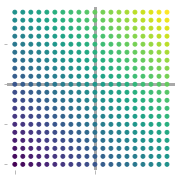

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.scatter(xx, yy, s=15, c=xx+yy)


# [...] Add axis, x and y witht the same scale
# draw axes
plt.axhline(0, c='#A9A9A9', zorder=0)
plt.axvline(0, c='#A9A9A9', zorder=0)
# assure x and y axis have the same scale
plt.axis('equal')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
plt.show()


- Let's visualize the transformation associated with the following matrix:

$$
\mT = \begin{bmatrix}
    -1 & 0 \\\\
    0 & -1
\end{bmatrix}
$$


In [86]:
T = np.array([
    [-1, 0],
    [0, -1]
])

- To see the effect of a matrix on the grid, consider each point as a two-dimensional vector (x, y).



In [87]:
xy =  np.vstack([xx.flatten(), yy.flatten()])
xy.shape

(2, 400)

<img src="images/grid_shape.png" width="300">
Shape of `xy`.

- We want the apply a matrix $\mT$ to each column vectors from `xy`: the shape of $T$ must be (x, 2).


In [89]:
trans = T @ xy
trans.shape

(2, 400)

- Let's reshape the arrays:

In [90]:
xx_transformed = trans[0].reshape(xx.shape)
yy_transformed = trans[1].reshape(yy.shape)

- We can now plot both grids to see the effect of $\mT$:

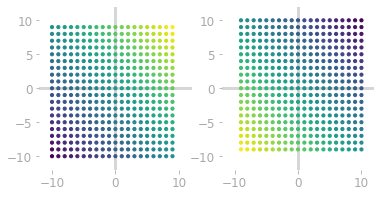

In [91]:
f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)


# [...] Add axis, x and y witht the same scale
# draw axes
axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-12, 12)
axes[0].set_ylim(-12, 12)

axes[1].set_xlim(-12, 12)
axes[1].set_ylim(-12, 12)
plt.show()


- You can see that the matrix $\mT$ rotated the points of the grid


- The shape of the transformation matrix tells you the shape of the input and output vectors


- Let's try to transform the grid with the following matrix:

$$
\mT = \begin{bmatrix}
    1.3 & -2.4 \\\\
    0.1 & 2
\end{bmatrix}
$$

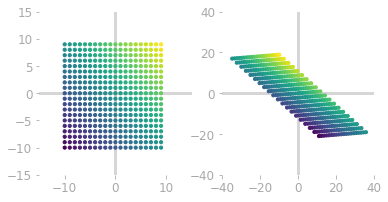

In [41]:
T = np.array([
    [1.3, -2.4],
    [0.1, 2]
])
trans = T @ xy

xx_transformed = trans[0].reshape(xx.shape)
yy_transformed = trans[1].reshape(yy.shape)

f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)
# [...] Add axis, x and y witht the same scale

# draw axes
axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-15, 15)
axes[0].set_ylim(-15, 15)

axes[1].set_xlim(-40, 40)
axes[1].set_ylim(-40, 40)
plt.show()


- This transformation is not a single rotation but also a stretching.

## 1.3 Exercises

Apply the following matrix to the grid and visualize the results:

1. $$
\mT = \begin{bmatrix}
    1 & 0 \\\\
    0 & 1
\end{bmatrix}
$$

<details>
  <summary>Click to see a solution!</summary>
  <pre>
T = np.array([
    [1, 0],
    [0, 1]
])
trans = T @ xy

xx_transformed = trans[0].reshape(xx.shape)
yy_transformed = trans[1].reshape(yy.shape)

f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)

axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-12, 12)
axes[0].set_ylim(-12, 12)

axes[1].set_xlim(-12, 12)
axes[1].set_ylim(-12, 12)
plt.show()
  </pre>
</details>


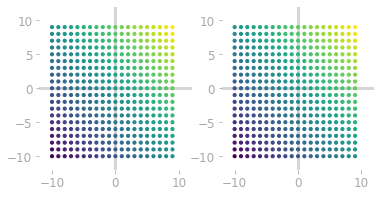

In [92]:
T = np.array([
    [1, 0],
    [0, 1]
])
trans = T @ xy

xx_transformed = trans[0].reshape(xx.shape)
yy_transformed = trans[1].reshape(yy.shape)


f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)


axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)


axes[0].set_xlim(-12, 12)
axes[0].set_ylim(-12, 12)


axes[1].set_xlim(-12, 12)
axes[1].set_ylim(-12, 12)
plt.show()

# 2. Special Matrices

## 2.1 Identity, and Diagonal Matrices

### Identity Matrices

- Identity matrices contain ones in the main diagonal and zeros elsewhere.

<img src="images/identity_matrix.png" width="150">
Example of a 3 by 3 identity matrix.

- As you saw in the previous exercise, identity matrices doesn't change the vectors it transforms.

### Diagonal Matrices

- Non-zero values only in the diagonal.

<img src="images/diagonal_matrix.png" width="150">
Example of a diagonal matrix.

- Linear transformation is a scaling (with no rotation). For instance:


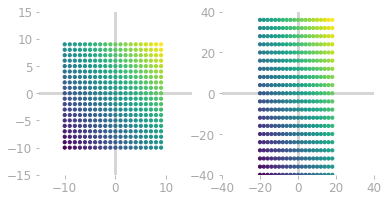

In [93]:
T = np.array([
    [2, 0],
    [0, 4]
])
trans = T @ xy

xx_transformed = trans[0].reshape(xx.shape)
yy_transformed = trans[1].reshape(yy.shape)

f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)
# [...] Add axis, x and y witht the same scale

# draw axes
axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-15, 15)
axes[0].set_ylim(-15, 15)

axes[1].set_xlim(-40, 40)
axes[1].set_ylim(-40, 40)
plt.show()

## 2.2 Inverse of a Matrix


- If it exists, the inverse $\mA^{-1}$ of a matrix $\mA$ is defined as:

$$
\mA \mA^{-1} = \mA^{-1}\mA = \mI
$$

- Only square matrices have an inverse. In addition, square matrices that are not invertible are called singular matrices.

In [94]:
A = np.array([
    [1, -4, 5],
    [8, 5, -3],
    [3, 2, 12]
])
A_inv = np.linalg.inv(A)
np.round(A @ A_inv, 15)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [-0., -0.,  1.]])

In [52]:
np.round(A_inv @ A, 15)

array([[ 1.,  0., -0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

- The linear transformation associated with an invertible matrix $\mT$ can be reversed by its inverse $\mT^{-1}$. For instance:

$$
\mT = \begin{bmatrix}
    1.3 & -2.4 \\\\
    0.1 & 2
\end{bmatrix}
$$

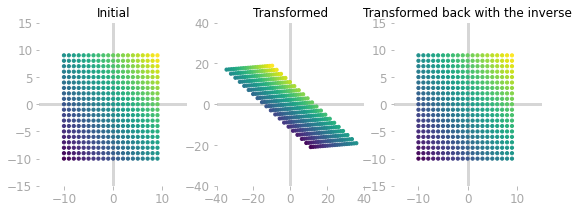

In [53]:
T = np.array([
    [1.3, -2.4],
    [0.1, 2]
])

trans = T @ xy
T_inv = np.linalg.inv(T)
un_trans = T_inv @ T @ xy 

f, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(trans[0].reshape(xx.shape), trans[1].reshape(yy.shape), s=10, c=xx+yy)
axes[2].scatter(un_trans[0].reshape(xx.shape), un_trans[1].reshape(yy.shape), s=10, c=xx+yy)


# [...] Add axis, x and y witht the same scale
# draw axes
axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)
axes[2].axhline(0, c='#d6d6d6', zorder=0)
axes[2].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-15, 15)
axes[0].set_ylim(-15, 15)
axes[0].set_title("Initial")

axes[1].set_xlim(-40, 40)
axes[1].set_ylim(-40, 40)
axes[1].set_title("Transformed")

axes[2].set_xlim(-15, 15)
axes[2].set_ylim(-15, 15)
axes[2].set_title("Transformed back with the inverse")
plt.show()


- Note the order of the operation (from left to right).


- It is not possible to go back with singular matrices. For instance:

$$
\mT = \begin{bmatrix}
    3 & 6 \\\\
    2 & 4
\end{bmatrix}
$$

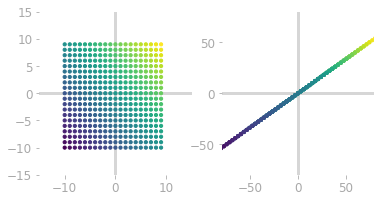

In [54]:
T = np.array([
    [3, 6],
    [2, 4],
])
trans = T @ xy

f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(trans[0].reshape(xx.shape), trans[1].reshape(yy.shape), s=10, c=xx+yy)


# [...] Add axis, x and y witht the same scale
# draw axes
axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-15, 15)
axes[0].set_ylim(-15, 15)

axes[1].set_xlim(-80, 80)
axes[1].set_ylim(-80, 80)
plt.show()

- Multiple points at the same place in the output space.

## 2.3 Exercises

Consider the following matrix:


$$
\mT = \begin{bmatrix}
    7.1 & 4.2 \\\\
    1.0 & -3.5
\end{bmatrix}
$$

1. Apply the linear transformation corresponding to the matrix $\mT$.

<details>
  <summary>Click to see a solution!</summary>
  <pre>
T = np.array([
    [7.1, 4.2],
    [1.0, -3.5],
])

trans = T @ xy
  </pre>
</details>

2. Visualize its effects on the grid.

<details>
  <summary>Click to see a solution!</summary>
  <pre>
f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(trans[0].reshape(xx.shape), trans[1].reshape(yy.shape), s=10, c=xx+yy)


axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-15, 15)
axes[0].set_ylim(-15, 15)

axes[1].set_xlim(-120, 120)
axes[1].set_ylim(-120, 120)
plt.show()
  </pre>
</details>


3. Find the matrix that can transform back the grid to its initial form.

<details>
  <summary>Click to see a solution!</summary>
  <pre>
np.linalg.inv(T)
  </pre>
</details>

4. Check your solution visually.

<details>
  <summary>Click to see a solution!</summary>
  <pre>
f, axes = plt.subplots(1, 2, figsize=(6, 3))

un_trans = np.linalg.inv(T) @ trans

axes[0].scatter(trans[0].reshape(xx.shape), trans[1].reshape(yy.shape), s=10, c=xx+yy)
axes[1].scatter(un_trans[0].reshape(xx.shape), un_trans[1].reshape(yy.shape), s=10, c=xx+yy)


axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-120, 120)
axes[0].set_ylim(-120, 120)

axes[1].set_xlim(-15, 15)
axes[1].set_ylim(-15, 15)

plt.show()
  </pre>
</details>


In [97]:
T = np.array([
    [7.1, 4.2],
    [1.0, -3.5],
])

trans = T @ xy

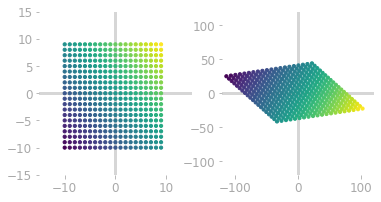

In [98]:
f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(trans[0].reshape(xx.shape), trans[1].reshape(yy.shape), s=10, c=xx+yy)


axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)


axes[0].set_xlim(-15, 15)
axes[0].set_ylim(-15, 15)


axes[1].set_xlim(-120, 120)
axes[1].set_ylim(-120, 120)
plt.show()

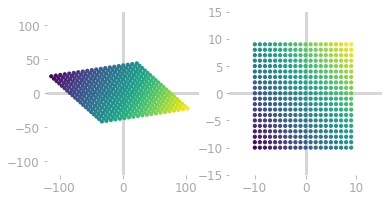

In [99]:
f, axes = plt.subplots(1, 2, figsize=(6, 3))

un_trans = np.linalg.inv(T) @ trans


axes[0].scatter(trans[0].reshape(xx.shape), trans[1].reshape(yy.shape), s=10, c=xx+yy)
axes[1].scatter(un_trans[0].reshape(xx.shape), un_trans[1].reshape(yy.shape), s=10, c=xx+yy)


axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)


axes[0].set_xlim(-120, 120)
axes[0].set_ylim(-120, 120)


axes[1].set_xlim(-15, 15)
axes[1].set_ylim(-15, 15)


plt.show()

# 3. From Linear Combinations to Basis

## 3.1 Linear Combinations

A linear combination of two vectors is the sum of these vectors, each multiplied by a scalar.


- Let's take an example with $3\vu + 4\vv$, with the following vectors $\vu$ and $\vv$:

$$
\vu = \begin{bmatrix}
    2 \\\\
    3
\end{bmatrix}
$$

and

$$
\vv = \begin{bmatrix}
    3 \\\\
    -1
\end{bmatrix}
$$

$$
3\vu + 4\vv =
3 \begin{bmatrix}
    2 \\\\
    3
\end{bmatrix}
+ 4
\begin{bmatrix}
    3 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    3 \cdot 2 \\\\
    3 \cdot 3
\end{bmatrix}
+ \begin{bmatrix}
    4 \cdot 3 \\\\
    4 \cdot -1
\end{bmatrix}
= \begin{bmatrix}
    6 + 12 \\\\
    9 - 4
\end{bmatrix}
= \begin{bmatrix}
    18 \\\\
    5
\end{bmatrix}
$$

- The linear combinations results in a new vector.


- It can be expressed as the product of the matrix $\mA$ and the weights applied to these vectors.

$$
\mA = \begin{bmatrix}
    2 & 3 \\\\
    3 & -1
\end{bmatrix}
$$


$$
\mA \cdot
\begin{bmatrix}
    3 \\\\
    4
\end{bmatrix}
= \begin{bmatrix}
    2 & 3 \\\\
    3 & -1
\end{bmatrix}
\begin{bmatrix}
    3 \\\\
    4
\end{bmatrix}
= 3 \begin{bmatrix}
    2 \\\\
    3
\end{bmatrix} + 4 \begin{bmatrix}
    3 \\\\
    -1
\end{bmatrix}
= \begin{bmatrix}
    3 \cdot 2 + 4 \cdot 3 \\\\
    3 \cdot 3 + 4 \cdot (-1)
\end{bmatrix}
= \begin{bmatrix}
    18 \\\\
    5
\end{bmatrix}
$$

## 3.2 Span

The span of a set of vector is the space you obtain from all possible linear combinations of these vectors.

- For instance, the span of two vectors with different directions is a plane, illustrated in the following figure:

<img src="images/linear_combination_two_vectors.png" width="300">
All linear combinations of two vectors with different directions draw a plane.


- A set of vectors *spans the space* if any vector of that space can be obtained by linear combinations of this set.


## 3.3 Linear dependency

If two vectors are on the same line, you can't access location outside of this line by linear combinations of these vectors. There is a linear dependency between these vectors.

## 3.4. Basis
	
You need a reference to go from arrows to list of numbers: this is the basis.


- Vector coordinates depend on an implicit choice of basis vectors.


- To be considered as a basis, a set of vectors must: be linearly independent and span the space.


- Basis vectors


- Example: the basis vector in the Cartesian plane:

<img src="images/basis_vectors.png" width="300px">
The basis vectors in the Cartesian plane.

- Every vectors can be obtained as a linear combination of the basis vectors


## 3.5 Exercises


Is the following two vectors are dependent? You can plot them to find the answer visually.


$$
\vu = \begin{bmatrix}
    2 \\\\
    3
\end{bmatrix}
$$

and

$$
\vv = \begin{bmatrix}
    3 \\\\
    -1
\end{bmatrix}
$$

<details>
  <summary>Click to see a solution!</summary>
  <pre>
u = np.array([2, 3])
v = np.array([3, -1])

plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='#84EE29')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='#2EBCE7')

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.axhline(0, c='#a9a9a9', zorder=1)
plt.axvline(0, c='#a9a9a9', zorder=1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
  </pre>
</details>

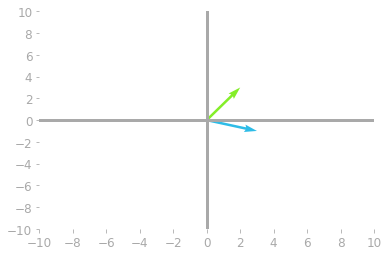

In [105]:
u = np.array([2, 3])
v = np.array([3, -1])

plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='#84EE29')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='#2EBCE7')


ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.axhline(0, c='#a9a9a9', zorder=1)
plt.axvline(0, c='#a9a9a9', zorder=1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

# 4. System of equations

You'll see here how to convert data into systems of equations and see how to use the normal equation to do a linear regression.

## 4.1 Number of Solutions

- A system of equations is multiple equations describing the relationship between variables

$$
\begin{cases}
y &= 2x + 1\\\\
y &= -0.5x + 3
\end{cases}
$$

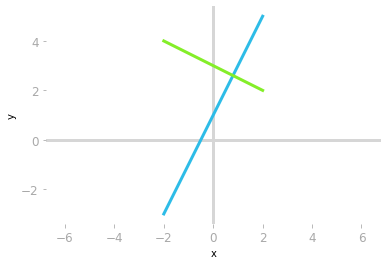

In [111]:
x = np.linspace(-2, 2, 100)
y = 2 * x + 1
y1 = -0.5 * x + 3
plt.plot(x, y)
plt.plot(x, y1)




# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


- The system of equations can have no solution, one solution, or an infinite number of solutions.

<img src="images/solutions_systems_equations.png" width="600">
Summary of the three situations for two equations and two variables.



## 4.2 Systems of Equations as Matrices

You can represent system of equations as matrices. Let's take again the last system and let's rearrange the variables:

$$
\begin{cases}
y - 2x &= 1\\\\
y - 2x &= 3
\end{cases}
$$

- You can write it as a linear combination:

<img src="images/system_column_picture.png" width="600">
Considering the system of equations as column vectors scaled by the variables $x$ and $y$.

- This leads to the following notation of systems of equations: $\mA \vx = \vb$ (the vector $\vx$ corresponds to $x$ and $y$ with the notation of the previous example).



## 4.3 Projections

- You can use linear algebra to find a solution if it exists. The goal is to find the values of the vector $\vx$:

$$
\begin{aligned}
\mA \vx &= \vb \\\\
\mA^{-1}\mA \vx &= \mA^{-1}\vb \\\\
\vx &= \mA^{-1}\vb
\end{aligned}
$$

- This doesn't work for systems that don't have a solution (the matrix $\mA$ is singular). In these case, we want to find an approximation with projection.


- There is no solution if the target vector ($\vb$) is outside of the *column space* of $\mA$


<img src="images/output_ch09_41_0.png" width="400">
The target vector (green) is outside of the span of the column space (blue).

- The best approximation is the projection of the target vector onto the column space. It corresponds to the *normal equation*:

$$
\hat{\vx} = (\mA^{\text{T}}\mA)^{-1}\mA^{\text{T}}\vb
$$


## 4.4 Practical Example

In this example, you'll see how to go from data to systems of equations and do linear regression using the normal equation.

Take the following two-dimensional data points:

- A: (0, 0)
- B: (1, 2)
- C: (2, 1)


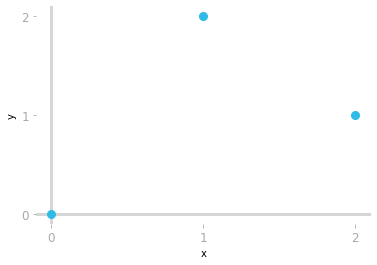

In [114]:
x = np.array([0, 1, 2])
y = np.array([0, 2, 1])
plt.scatter(x, y)



# Assure that ticks are displayed with a step equal to 1
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

- We want to fit a line so we need to optimize two parameters: the slope ($\theta_0$) and the $y$-intercept ($\theta_1$).

$$
\vy=\theta_0 \vx + \theta_1
$$

- You can consider each point as an equation. You'll have the following system of equations:

$$
\begin{cases}
0 &= 0 \cdot \theta_0 + \theta_1 \\\\
2 &= 1 \cdot \theta_0 + \theta_1 \\\\
1 &= 2 \cdot \theta_0 + \theta_1
\end{cases}
$$

- Under the matrix form:

$$
\begin{bmatrix}
    0 & 1 \\\\
    1 & 1 \\\\
    2 & 1
\end{bmatrix}
\begin{bmatrix}
    \theta_0 \\\\
    \theta_1
\end{bmatrix}
= \begin{bmatrix}
    0 \\\\
    2 \\\\
    1
\end{bmatrix}
$$


In [115]:
A = np.array([
    [0, 1],
    [1, 1],
    [2, 1]
])

b = np.array([
    [0],
    [2],
    [1]
])

- Using the normal equation:


In [116]:
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b
x_hat

array([[0.5],
       [0.5]])

- Let's plot the resulting line (slope of 0.5 and $y$-intercept of 0.5):

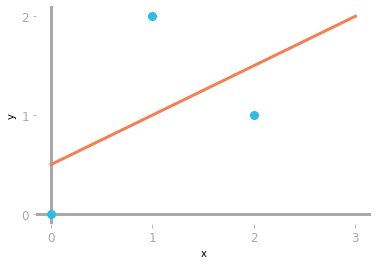

In [117]:
x = np.array([0, 1, 2])
y = np.array([0, 2, 1])

x1 = np.linspace(0, 3, 10)
y1 = 0.5 * x1 + 0.5

plt.scatter(x, y)
plt.plot(x1, y1, c="#F57F53")
# [...] Add axes, styles...
####_hide
# Assure that ticks are displayed with a step equal to 1
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# draw axes
plt.axhline(0, c='#A9A9A9', zorder=0)
plt.axvline(0, c='#A9A9A9', zorder=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()